<a href="https://colab.research.google.com/github/amalvarezme/ProcesoDigitalSen/blob/master/PDS_Notebooks/2_spectral_analysis_deterministic_signals/4_stft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spectral Analysis of Deterministic Signals

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Short-Time Fourier Transform


The discrete Fourier transform (DFT) is not very well suited for the analysis of non-stationary signals when applied to the entire signal at once. Furthermore practical signals, for instance, an antenna signal, cannot be analyzed in an on-line manner by the DFT. This motivates to split a long signal into segments and compute the DFT on these segments. This transform is known as the [short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (STFT).

The STFT $X[\mu, n]$ of a signal $x[k]$ is defined as

\begin{equation}
X[\mu, n] = \sum_{k = n}^{n+N-1} x[k] \, w[k-n] \;  \mathrm{e}^{\,-\mathrm{j}\,\frac{2 \pi}{N} k \mu}
\end{equation}

where $w[k]$ denotes a window function of length $N$ which is normalized by $\sum_{k=0}^{N-1} w[k] = 1$. Starting from $k=n$, the signal $x[k]$ is windowed by $w[k]$ to a segment of length $N$. This windowed segment is then transformed by a DFT of length $N$.

The STFT has many applications in digital signal processing, for instance, in the spectral analysis of signals or the processing of instationary signals. The resulting spectrum $X[\mu, n]$ depends on the frequency index $\mu$ and the time index $n$. The spectral domain is therefore also termed as [time-frequency domain](https://en.wikipedia.org/wiki/Time%E2%80%93frequency_representation) and techniques using the STFT as time-frequency processing.

The properties of the STFT depend on

* the length $N$ of the segments,
* the overlap between the segments, and
* the window function $w[k]$.

The size $N$ of the segments and the window function influence the spectral and temporal resolution of the STFT. The time index $n$ of the STFT can be increased by an arbitrary step size. The step size determines the overlap between two consecutive STFTs. For instance, the spectra $X[\mu, n]$ and $X[\mu, n+1]$ have $N-1$ overlapping samples. The overlap is sometimes given as percentage of the segment length $N$.

## The Spectrogram

The magnitude $|X[\mu, n]|$ of the STFT is known as the [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) of a signal. It is frequently used to analyze signals in the time-frequency domain, for instance by a [spectrum analyzer](https://en.wikipedia.org/wiki/Spectrum_analyzer).

In [1]:
#loading voice data from drive
FILEID = "14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir


--2021-11-10 14:42:38--  https://docs.google.com/uc?export=download&confirm=&id=14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X
Resolving docs.google.com (docs.google.com)... 108.177.120.101, 108.177.120.102, 108.177.120.138, ...
Connecting to docs.google.com (docs.google.com)|108.177.120.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-as-docs.googleusercontent.com/docs/securesc/a1rloa4ah6o2ppprb5d1s4aa6eaomtq3/076qpsobideocav0352i8hn8pg03j456/1636555350000/09173029842254050324/08911342652882728973Z/14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X?e=download [following]
--2021-11-10 14:42:38--  https://doc-10-as-docs.googleusercontent.com/docs/securesc/a1rloa4ah6o2ppprb5d1s4aa6eaomtq3/076qpsobideocav0352i8hn8pg03j456/1636555350000/09173029842254050324/08911342652882728973Z/14ArFcbwqGwpHFHYHFJI_Y2cuaJmiN23X?e=download
Resolving doc-10-as-docs.googleusercontent.com (doc-10-as-docs.googleusercontent.com)... 74.125.124.132, 2607:f8b0:4001:c14::84
Connecting

**Example - Spectrogram of a chirp/sweep signal**

The following example compares the Fourier transform and spectrogram of a [chirp](https://en.wikipedia.org/wiki/Chirp)/sweep signal. A chirp signal is a signal whose instantaneous frequency increases or decreases with time. Lets first listen to a chirp signal whose instantaneous frequency increases linear with time.

Now the magnitude spectrum $|X(e^{j \Omega})|$ of a chirp signal is computed and plotted.

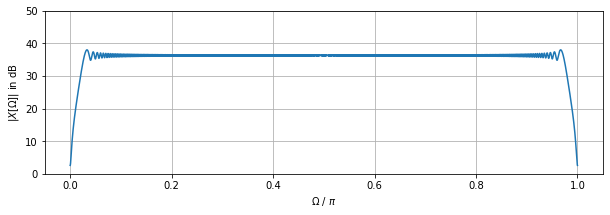

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig


N = 8192  # length of the signal

# generate signal
k = np.arange(N)
x = sig.chirp(k, 0.01, N, .49)

# compute and plot magnitude spectrum
plt.figure(figsize = (10, 3))
f = np.fft.rfftfreq(N, 1/2)
plt.plot(f, 20*np.log10(abs(np.fft.rfft(x))))
plt.xlabel(r'$\Omega$ / $\pi$')
plt.ylabel(r'$|X[\Omega]|$ in dB')
plt.ylim([0, 50])
plt.grid()

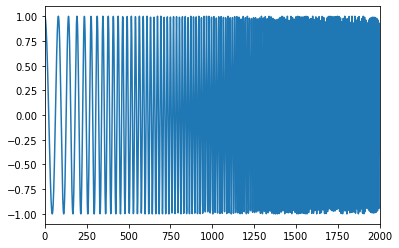

In [3]:
plt.plot(x)
plt.xlim([0,2000])
plt.show()

Followed by the spectrogram of the chirp signal

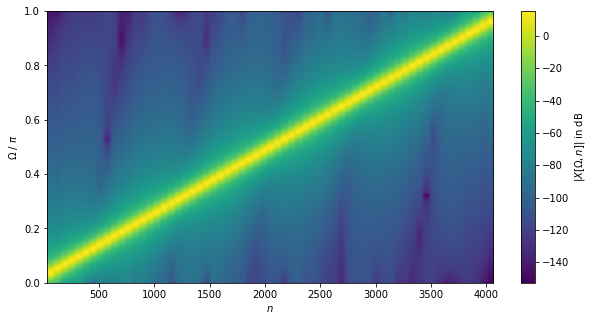

In [ ]:
L = 256  # length of one segment
overlap = 128  # overlap between segments

plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=2, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$')
plt.ylabel(r'$\Omega$ / $\pi$')
cb = plt.colorbar()
cb.set_label(r'$|X[\Omega,n]|$ in dB')
plt.autoscale(tight=True)

**Exercise**

* Which spectral properties of the chirp signal can be concluded from the magnitude spectrum and the spectrogram?
* Change the segment length `L` of the spectrogram and the overlap `overlap` between segments. Rerun the example. What changes?
* Change the window function used for the spectrogram by extending the call to `plt.specgram` by the parameter `window`. For instance add `window = np.ones(L)` for the rectangular window.

Solution: The magnitude spectrum, which has been computed from the entire signal, shows only that the overall spectrum of the chirp is approximately constant. The temporal evolution of the instantaneous frequency of the chirp signal can only be observed in the spectrogram. It can be concluded that the instantaneous frequency increases linear with time. A higher segment length leads to a narrower main lobe and thus better visibility of the current frequency. With a higher overlap, the spectrum has a higher temporal resolution.

**Example - Spectrogram of a speech signal**

The following example computes the spectrogram of a speech signal containing a short sentence. Lets first listen to the speech signal:

In [4]:
import IPython
IPython.display.Audio("data/speech.wav")

The signal is loaded using the [`soundfile`](http://pysoundfile.readthedocs.io/en/latest/) module for Python.

In [5]:
!pip install --upgrade soundfile

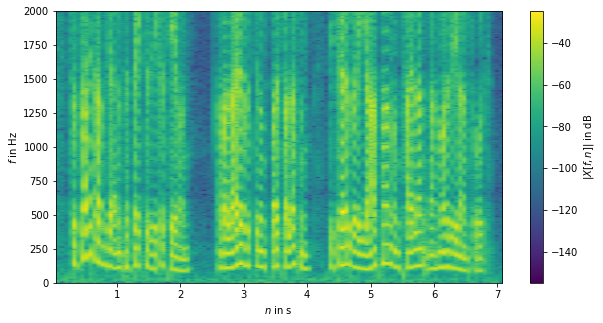

In [6]:
import soundfile as sf

L = 1024  # length of one segment
overlap = 512  # overlap between segments

# read speech signal from file
x, fs = sf.read('data/speech_8k.wav')
x = x/np.max(np.abs(x))

# compute and plot spectrogram
plt.figure(figsize = (10, 5))
plt.specgram(x, NFFT=L, Fs=fs, noverlap=overlap, sides='onesided')
plt.xlabel(r'$n$ in s')
plt.ylabel(r'$f$ in Hz')
cb = plt.colorbar()
cb.set_label(r'$|X[f,n]|$ in dB')
plt.autoscale(tight=True)
plt.ylim([0, 2000]);

In [10]:
print(x.shape,fs,x.shape[0]/fs)

(56838,) 8000 7.10475


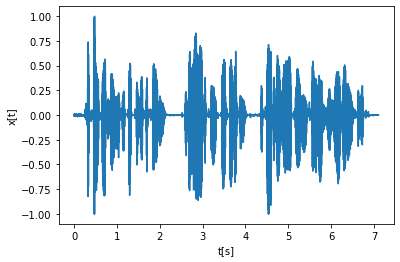

In [11]:
plt.plot(np.arange(0,x.shape[0]/fs,1/fs),x)
plt.xlabel('t[s]')
plt.ylabel('x[t]')
plt.show()

**Exercise**

* A speech signal exhibits a specific spectral structure. What insights can you gain from the spectrum above?
* Change the segment length and overlap of the STFT. How does the spectrogram change?

Solution: In case of a vowel a speech signal is periodic due to the underlying speech production mechanism. A periodic signal has a line spectrum consisting of a fundamental frequency and various harmonics with multiple of the fundamental frequency. The [harmonic structure of the vowels](https://en.wikipedia.org/wiki/Formant) is visible in the spectrogram.

**Exercise**

- Using the [stft package from scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html), plot the spectrum of $x(t) = A_1 \cos(2\pi F_1 t) + A_2 \cos(2\pi F_2 t)$ for different values of $A_1,A_2,F_1,F_2\in \mathbb{R}.$.

- Repeat for $x(t) = A_1 \cos(2\pi F_1 t) + \mu(t-1.5/F1)A_2 \cos(2\pi F_2 t)$, being $\mu(\cdot)$ the step (Heaviside) function.

1500


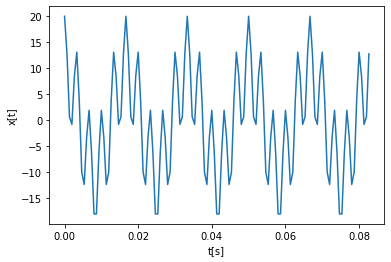

In [34]:
from scipy.signal import stft
A1 = 10
A2 = 10
F1 = 60
F2 = 300
Fs = 5*np.array([F1,F2]).max()
print(Fs)
t = np.arange(0,5/(np.array([F1,F2]).min()),1/Fs)
x = A1*np.cos(2*np.pi*F1*t) + A2*np.cos(2*np.pi*F2*t)
plt.plot(t,x)
plt.xlabel('t[s]')
plt.ylabel('x[t]')
plt.show()

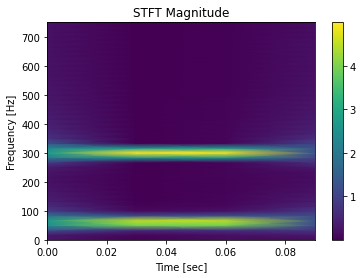

In [36]:
wt = 0.06
nperseg = int(wt*Fs)
f, tsp, Zxx = stft(x, Fs, nperseg=nperseg)
#plt.pcolormesh(t, f, 20*np.log10(np.abs(Zxx)), shading='gouraud')
plt.pcolormesh(tsp, f, (np.abs(Zxx)), shading='gouraud')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [37]:
print(nperseg,f.shape)
print(f)
print(tsp)

90 (46,)
[  0.          16.66666667  33.33333333  50.          66.66666667
  83.33333333 100.         116.66666667 133.33333333 150.
 166.66666667 183.33333333 200.         216.66666667 233.33333333
 250.         266.66666667 283.33333333 300.         316.66666667
 333.33333333 350.         366.66666667 383.33333333 400.
 416.66666667 433.33333333 450.         466.66666667 483.33333333
 500.         516.66666667 533.33333333 550.         566.66666667
 583.33333333 600.         616.66666667 633.33333333 650.
 666.66666667 683.33333333 700.         716.66666667 733.33333333
 750.        ]
[0.   0.03 0.06 0.09]


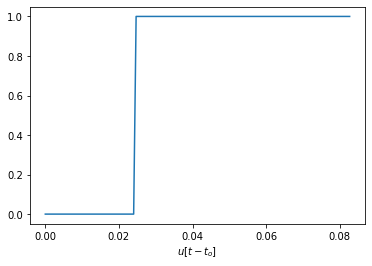

In [38]:
u = np.ones(x.shape[0])
to = 1.5/F1
Nm = int(to*Fs)
u[:Nm] = 0
plt.plot(t,u)
plt.xlabel('t [s]')
plt.xlabel('$u [t-t_o]$')
plt.show()

$$F_s\geq 2 F_{max}$$

$$F_{max}\leq \frac{F_s}{2}$$

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.